***
#📊 <font color="#274C77">Análisis de Evasión de Clientes - TelecomX Parte 2</font>
***

## **1. Introducción**


### **1.1 Contexto del desafío**
Fuiste promovido después de tu excelente desempeño en el análisis regulatorio de la cancelación de clientes.  
Tu dedicación, claridad al comunicar datos y visión estratégica marcaron la diferencia.  
Ahora formas parte del equipo de **Machine Learning**, con la misión de desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  


### **1.2 Objetivo del análisis**
El objetivo principal es **anticipar la cancelación de clientes (Churn)** mediante:
- Preparación y tratamiento de datos.  
- Construcción y evaluación de modelos de clasificación.  
- Interpretación de resultados e identificación de factores clave de cancelación.  
- Propuesta de estrategias de retención basadas en los insights obtenidos.

## **2. Configuración del entorno**

### **2.1 Importación de Librerías**

Comenzamos cargando todas las librerías necesarias para manipulación de datos, visualización, preprocesamiento y modelado. Se incluye manejo de errores para asegurar que el entorno tenga todos los paquetes disponibles.

In [23]:
# Librerías principales
try:
    import pandas as pd
    from pandas import json_normalize
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px


    print("✅ Librerías de análisis y visualización cargadas correctamente.")
except ImportError as e:
    print(f"❌ Error al importar librerías principales: {e}")

# Librerías para machine learning
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    print("✅ Librerías de machine learning cargadas correctamente.")
except ImportError as e:
    print(f"❌ Error al importar librerías de machine learning: {e}")

# Configuraciones generales
try:
    import warnings
    warnings.filterwarnings('ignore')
    pd.set_option('display.max_columns', None)
    print("✅ Configuraciones aplicadas.")
except Exception as e:
    print(f"❌ Error en configuración inicial: {e}")


✅ Librerías de análisis y visualización cargadas correctamente.
✅ Librerías de machine learning cargadas correctamente.
✅ Configuraciones aplicadas.


## **3. Carga y Preparación de Datos**

En esta etapa cargamos el dataset directamente desde un repositorio público de GitHub. Posteriormente, realizamos una exploración preliminar para entender su estructura general y detectar posibles problemas a resolver.
En esta sección se carga el dataset tratado desde GitHub mediante **pandas.read_csv()** sobre la URL **raw.githubusercontent.com**. Este enfoque mejora la portabilidad del notebook y facilita la trazabilidad del análisis.

El archivo corresponde al dataset transformado en la **Parte 1** del desafío TelecomX_LATAM, y servirá como base estructurada para el análisis exploratorio y la construcción de modelos.

### **3.1 Extracción de datos desde GitHub (CSV)**

In [24]:
# Cargar dataframe desde GitHub (formato CSV)
try:
    import pandas as pd

    url_data = 'https://raw.githubusercontent.com/PamelaOrmeno/TelecomX_parte2_Latam/refs/heads/main/Data/TelecomX_Data_Transformada.csv'

    df = pd.read_csv(url_data)
    df.columns = df.columns.str.strip().str.lower()
    print(f"✅ Datos cargados desde GitHub. Registros encontrados: {len(df)}")
    display(df.head())
except Exception as e:
    print(f"❌ Error al cargar datos desde GitHub: {e}")


✅ Datos cargados desde GitHub. Registros encontrados: 7256


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Un Año,1,Cheque enviado por correo,65.6,593.30,19.776667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mes a Mes,0,Cheque enviado por correo,59.9,542.40,18.080000
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,0,1,0,0,0,Mes a Mes,1,Cheque electrónico,73.9,280.85,9.361667
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,0,1,1,0,1,1,Mes a Mes,1,Cheque electrónico,98.0,1237.85,41.261667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,0,0,0,1,1,0,Mes a Mes,1,Cheque enviado por correo,83.9,267.40,8.913333


#### **3.1.1 Vista de columnas**
`df.columns.tolist()` entrega un inventario rápido de variables para confirmar las esperadas y detectar IDs/irrelevantes o nombres inconsistentes antes del modelado.

In [25]:
df.columns.tolist()

['customerid',
 'churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'charges.monthly',
 'charges.total',
 'cuentas_diarias']

#### **3.1.2 Resumen de estructura**
`df.info()` muestra filas, columnas, tipos de dato y conteo de no nulos por variable, útil para detectar faltantes, tipos erróneos y estimar memoria antes del preprocesamiento.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7256 non-null   object 
 1   churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   seniorcitizen     7256 non-null   int64  
 4   partner           7256 non-null   int64  
 5   dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   phoneservice      7256 non-null   int64  
 8   multiplelines     7256 non-null   int64  
 9   internetservice   7256 non-null   object 
 10  onlinesecurity    7256 non-null   int64  
 11  onlinebackup      7256 non-null   int64  
 12  deviceprotection  7256 non-null   int64  
 13  techsupport       7256 non-null   int64  
 14  streamingtv       7256 non-null   int64  
 15  streamingmovies   7256 non-null   int64  
 16  contract          7256 non-null   object 


### **3.2 Eliminación de columnas irrelevantes**

Antes de avanzar con el análisis exploratorio y el desarrollo de modelos predictivos, es fundamental depurar el conjunto de datos, eliminando aquellas columnas que no aportan valor analítico o que pueden introducir ruido en el modelo.

En este caso, se identificaron las siguientes columnas como candidatas a eliminar:

- **`customerid`**: corresponde a un identificador único para cada cliente. No aporta información útil para el análisis ni tiene poder predictivo.
- **`cuentas_diarias`**: representa un acumulado similar a `charges.total`, sin un valor adicional significativo.
- **`charges.total`**: aunque representa el total de cobros, podría estar altamente correlacionado con otras variables y generar fuga de información si no se trata adecuadamente.

Estas columnas fueron removidas del conjunto de datos para asegurar un análisis más limpio y robusto.


In [27]:
# 🔧 Eliminación de columnas irrelevantes
try:
    columnas_a_eliminar = ['customerid', 'cuentas_diarias', 'charges.total']
    df = df.drop(columns=columnas_a_eliminar)
    print(f"✅ Columnas eliminadas correctamente: {columnas_a_eliminar}")
except KeyError as e:
    print(f"⚠️ Alguna columna no fue encontrada y no se eliminó: {e}")
except Exception as e:
    print(f"❌ Error inesperado al eliminar columnas: {e}")


✅ Columnas eliminadas correctamente: ['customerid', 'cuentas_diarias', 'charges.total']


### **3.3 Unificación de valores**
En este bloque se realiza la **unificación de valores** con el fin de estandarizar las categorías que aparecen de forma distinta en el dataset pero que representan la misma información.  
Este paso evita duplicación de categorías, mejora la consistencia de los datos y asegura un correcto desempeño en las etapas de **codificación y modelado** posteriores.


In [28]:
# 🔄 Unificar "No internet service"/"No phone service" -> "No" SOLO si hay valores de texto
try:
    cols_objetivo = [
        "onlinesecurity", "onlinebackup", "deviceprotection",
        "techsupport", "streamingtv", "streamingmovies", "multiplelines"
    ]
    # Filtra solo las columnas que existan en el df
    cols_presentes = [c for c in cols_objetivo if c in df.columns]

    if not cols_presentes:
        print("⚠️ Ninguna de las columnas objetivo está presente en el DataFrame.")
    else:
        # Verificar si hay valores de texto que requieran unificación
        valores_texto = {"no internet service", "no phone service", "yes", "no"}
        hay_texto = any(
            df[c].astype(str).str.lower().isin(valores_texto).any()
            for c in cols_presentes
        )
        #hay_texto= True
        if not hay_texto:
            print("ℹ️ No se detectaron valores de texto en las columnas objetivo. No se aplicó unificación.")
        else:
            # Guarda valores únicos antes del cambio
            antes = {c: sorted(df[c].astype(str).unique().tolist()) for c in cols_presentes}

            # Mapeo de unificación
            mapping = {
                "No internet service": "No",
                "No phone service": "No"
            }

            # Aplicar reemplazo
            for c in cols_presentes:
                df[c] = df[c].astype(str).str.strip().replace(mapping)

            # Valores únicos después
            despues = {c: sorted(df[c].astype(str).unique().tolist()) for c in cols_presentes}

            # Reporte
            print("✅ Unificación completada en columnas:", cols_presentes)
            print("\nValores únicos ANTES de unificar:")
            for c in cols_presentes:
                print(f"- {c}: {antes[c]}")
            print("\nValores únicos DESPUÉS de unificar:")
            for c in cols_presentes:
                print(f"- {c}: {despues[c]}")

except Exception as e:
    print(f"❌ Error durante la unificación: {e}")


ℹ️ No se detectaron valores de texto en las columnas objetivo. No se aplicó unificación.


### **3.4 Codificación de variables categóricas**
Para que los algoritmos de machine learning puedan procesar variables categóricas, es necesario transformarlas a valores numéricos.
En este caso:

* `gender`: codificación binaria (`Masculino` → 1, `Femenino` → 0).

* `internetservice` y `paymentmethod`: One-Hot Encoding (se crean columnas binarias por categoría).

* `contract`: se aplica One-Hot Encoding, ya que no se impone un orden y se evita sesgo en modelos sensibles a escalas.



In [29]:
try:
    # Columnas
    columnas_cod = ["gender", "internetservice", "contract", "paymentmethod"]
    # Usar solo las que existan y sean categóricas (object)
    cols_ohe = [c for c in columnas_cod if c in df.columns and df[c].dtype == "object"]

    if not cols_ohe:
        print("ℹ️ No hay columnas categóricas tipo 'object' para codificar con get_dummies.")
    else:
        # Normalizar texto para evitar categorías duplicadas por mayúsculas/espacios
        for c in cols_ohe:
            df[c] = df[c].astype(str).str.strip()

        # One-Hot Encoding
        df = pd.get_dummies(df, columns=cols_ohe, drop_first=True, dummy_na=False)

        print("✅ Codificación categórica con get_dummies completada.")
        print("📐 Nueva forma del DataFrame:", df.shape)
        # Comprobación rápida de nulos
        print("🔎 Nulos totales tras codificar:", int(df.isnull().sum().sum()))

except Exception as e:
    print(f"❌ Error en la codificación categórica: {e}")


✅ Codificación categórica con get_dummies completada.
📐 Nueva forma del DataFrame: (7256, 23)
🔎 Nulos totales tras codificar: 0


### **3.5 Normalización y estandarización de datos (Min-Max Scaling)**
Algunos algoritmos de machine learning, como **KNN, redes neuronales, regresión logística y SVM**, son sensibles a la escala de las variables numéricas, lo que puede afectar su rendimiento y la convergencia durante el entrenamiento.
Para evitar que atributos con rangos grandes dominen sobre otros, se aplica **normalización Min-Max**, transformando los valores al rango **[0, 1]** sin alterar la distribución relativa de los datos.

In [30]:
try:
    # Identificar columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if not columnas_numericas:
        print("⚠️ No se encontraron columnas numéricas para normalizar.")
    else:
        # Inicializar el escalador
        scaler = MinMaxScaler()

        # Guardar copia original para referencia (opcional)
        df_original_numerico = df[columnas_numericas].copy()

        # Aplicar normalización Min-Max
        df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

        print(f"✅ Normalización Min-Max aplicada a columnas: {columnas_numericas}")
        print("📊 Rango después de normalizar:")
        for col in columnas_numericas:
            print(f"- {col}: min={df[col].min():.2f}, max={df[col].max():.2f}")

except Exception as e:
    print(f"❌ Error durante la normalización: {e}")


✅ Normalización Min-Max aplicada a columnas: ['churn', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'charges.monthly']
📊 Rango después de normalizar:
- churn: min=0.00, max=1.00
- seniorcitizen: min=0.00, max=1.00
- partner: min=0.00, max=1.00
- dependents: min=0.00, max=1.00
- tenure: min=0.00, max=1.00
- phoneservice: min=0.00, max=1.00
- multiplelines: min=0.00, max=1.00
- onlinesecurity: min=0.00, max=1.00
- onlinebackup: min=0.00, max=1.00
- deviceprotection: min=0.00, max=1.00
- techsupport: min=0.00, max=1.00
- streamingtv: min=0.00, max=1.00
- streamingmovies: min=0.00, max=1.00
- paperlessbilling: min=0.00, max=1.00
- charges.monthly: min=0.00, max=1.00


## **4. Análisis Exploratorio de Datos (EDA)**
El **Análisis Exploratorio de Datos (EDA)** busca comprender el comportamiento del dataset y detectar patrones preliminares relacionados con la **cancelación de clientes (churn)**. En esta etapa identificamos **sesgos**, **desbalances de clases**, **valores atípicos** y **relaciones entre variables** (incluida la multicolinealidad), para fundamentar decisiones de **limpieza**, **ingeniería de variables** y **selección de modelos**.


 ### **4.1 Verificación de la proporción de cancelación (Churn)**
En este paso validamos la proporción de clientes que cancelaron `(Churn = Yes)`frente a los que permanecieron `(Churn = No)`.
Esta verificación permite confirmar que el dataset mantiene el balance esperado y que no existen valores anómalos en la variable objetivo antes de pasar al análisis de correlación.

✅ Distribución de la variable 'churn':
churn
0.0    5387
1.0    1869
Name: count, dtype: int64

📊 Proporción (relativa):
churn
0.0    0.742
1.0    0.258
Name: proportion, dtype: float64

————————————————————————————————————————————————————————————————————————————————————————————————————



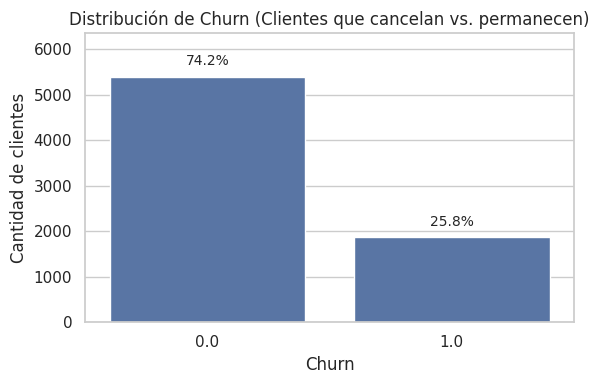

In [31]:
# Verificación de la Proporción de Cancelación (churn) con gráfico y porcentajes
try:
    if "churn" not in df.columns:
        raise KeyError("La columna 'churn' no está presente en el DataFrame.")

    # Conteo absoluto y relativo
    churn_counts = df["churn"].value_counts().sort_index()
    churn_ratio  = df["churn"].value_counts(normalize=True).sort_index()

    print("✅ Distribución de la variable 'churn':")
    print(churn_counts)
    print("\n📊 Proporción (relativa):")
    print(churn_ratio.round(3))

    # —— Separador visual antes del gráfico
    print("\n" + "—"*100 + "\n")

    # Gráfico de barras con margen extra para anotaciones
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=churn_counts.index.astype(str), y=churn_counts.values)

    plt.title("Distribución de Churn (Clientes que cancelan vs. permanecen)")
    plt.xlabel("Churn")
    plt.ylabel("Cantidad de clientes")

    # Aumentar el límite superior para que las etiquetas no choquen con el borde/título
    max_h = churn_counts.values.max()
    ax.set_ylim(0, max_h * 1.18)

    # Anotar porcentajes ligeramente por encima de cada barra
    total = churn_counts.sum()
    for patch, count in zip(ax.patches, churn_counts.values):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        pct = 100 * count / total
        ax.text(x, y + max_h * 0.035, f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error en la verificación de churn: {e}")

### **4.2 Distribución de variables categóricas y numéricas**
En esta sección se presentan las distribuciones generales de algunas variables **clave** para comprender el dataset y su relación con la cancelación de clientes (Churn).  
No se muestran todas las columnas, solo aquellas con mayor relevancia según la literatura y experiencia en telecomunicaciones.  


####**4.2.1 Distribución de variables categóricas**
En esta sección presentamos la distribución de **categorías clave** frente a `churn` cuando las columnas originales ya fueron **codificadas a variables dummies.**
El procedimiento detecta automáticamente las columnas que comienzan con los prefijos `contract_`, `internetservice_` y `paymentmethod_`.

* Si se usó `drop_first=True`, la categoría que actúa como **base** no aparece explícita en el DataFrame: la reconstruimos como **“BASE (drop_first)”** contabilizando las filas donde todas las dummies de esa variable están en cero.

* Los gráficos muestran, por cada categoría, el conteo de clientes que cancelaron `(churn=1)` y que **no cancelaron** `(churn=0)`, permitiendo una lectura rápida del impacto por categoría.


📊 Resumen categórico post-encoding: contract


,categoria,churn_0,churn_1,total
0,Mes a Mes,2350,1655,4005
2,BASE (drop_first),1685,48,1733
1,Un Año,1352,166,1518


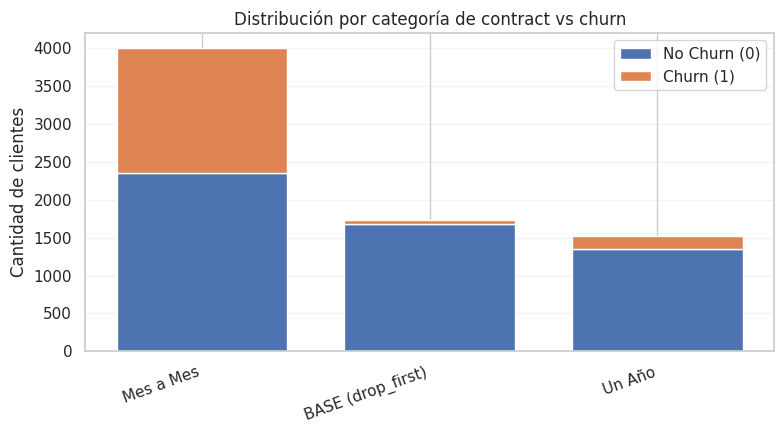


📊 Resumen categórico post-encoding: internetservice


,categoria,churn_0,churn_1,total
0,Fibra Óptica,1901,1297,3198
2,BASE (drop_first),2024,459,2483
1,Ninguno,1462,113,1575


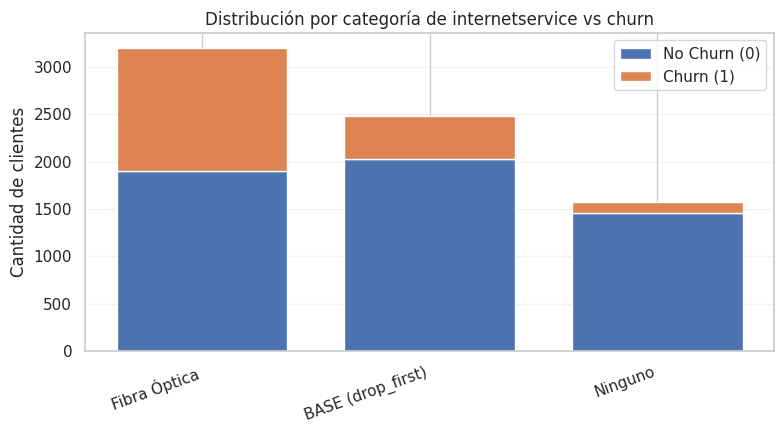


📊 Resumen categórico post-encoding: paymentmethod


,categoria,churn_0,churn_1,total
3,BASE (drop_first),1374,1071,2445
0,Cheque enviado por correo,1349,308,1657
2,Transferencia bancaria,1329,258,1587
1,Tarjeta de crédito,1335,232,1567


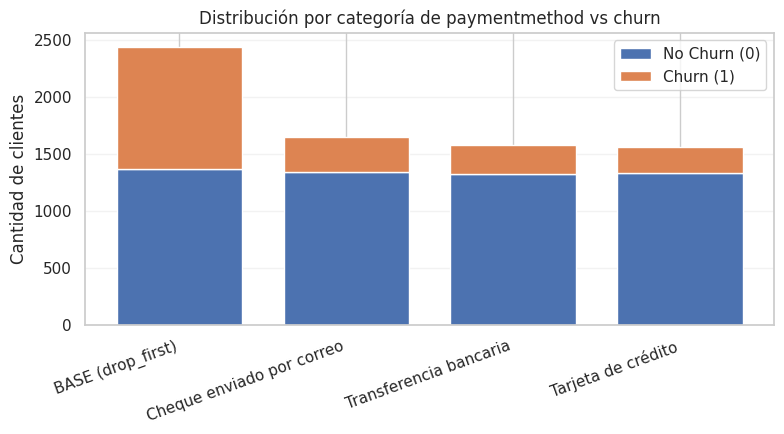

✅ Distribución categórica resumida (post-encoding) generada correctamente.


In [32]:
# 4.2.1 Distribución de variables categóricas
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # --- Configuración ---
    TARGET = "churn"  # ya normalizado a minúsculas
    VARS_BASE = ["contract", "internetservice", "paymentmethod"]
    PREFIXES = {v: [f"{v}_", f"{v}."] for v in VARS_BASE}  # admite _ y . como separador

    if TARGET not in df.columns:
        raise ValueError(f"No se encontró la columna objetivo '{TARGET}' en el DataFrame.")

    def _dummy_cols_for(var: str, columns) -> list:
        """Devuelve la lista de dummies que pertenecen a 'var' por prefijos conocidos."""
        cols = []
        for c in columns:
            for p in PREFIXES[var]:
                if c.startswith(p):
                    cols.append(c)
                    break
        return cols

    def _extract_category(var: str, col: str) -> str:
        """Obtiene el nombre de la categoría a partir del nombre de la dummy."""
        for p in PREFIXES[var]:
            if col.startswith(p):
                return col[len(p):]
        return col

    def _plot_stacked_counts(df_counts: pd.DataFrame, var: str):
        """Grafico de barras apiladas churn=0 y churn=1 por categoría."""
        # Asegurar orden estable por total descendente
        df_plot = df_counts.sort_values("total", ascending=False).copy()
        x = np.arange(len(df_plot))
        width = 0.75

        fig, ax = plt.subplots(figsize=(8, 4.5))
        ax.bar(x, df_plot["churn_0"], width, label="No Churn (0)")
        ax.bar(x, df_plot["churn_1"], width, bottom=df_plot["churn_0"], label="Churn (1)")

        ax.set_title(f"Distribución por categoría de {var} vs {TARGET}")
        ax.set_xticks(x)
        ax.set_xticklabels(df_plot["categoria"], rotation=20, ha="right")
        ax.set_ylabel("Cantidad de clientes")
        ax.legend(loc="upper right")
        ax.grid(axis="y", alpha=0.25)
        plt.tight_layout()
        plt.show()

    hubo_resultados = False

    for var in VARS_BASE:
        dummy_cols = _dummy_cols_for(var, df.columns)

        if not dummy_cols:
            print(f"⚠️ No se hallaron columnas dummies para '{var}'. "
                  f"Verifica si el prefijo es '{var}_' o '{var}.' en df.columns.")
            continue

        # Validar que las dummies sean binarias (0/1) y limpiar NaN a 0
        df_tmp = df[dummy_cols + [TARGET]].copy()
        df_tmp[dummy_cols] = df_tmp[dummy_cols].fillna(0).clip(lower=0, upper=1)

        # Conteo por categoría para churn=0/1
        registros = []
        for col in dummy_cols:
            cat = _extract_category(var, col)
            c0 = int(((df_tmp[col] == 1) & (df_tmp[TARGET] == 0)).sum())
            c1 = int(((df_tmp[col] == 1) & (df_tmp[TARGET] == 1)).sum())
            registros.append({"categoria": cat, "churn_0": c0, "churn_1": c1, "total": c0 + c1})

        # Reconstrucción de categoría base si se usó drop_first (todas las dummies en 0)
        base_mask = (df_tmp[dummy_cols].sum(axis=1) == 0)
        base_total = int(base_mask.sum())
        if base_total > 0:
            c0_base = int(((base_mask) & (df_tmp[TARGET] == 0)).sum())
            c1_base = int(((base_mask) & (df_tmp[TARGET] == 1)).sum())
            registros.append({
                "categoria": "BASE (drop_first)",
                "churn_0": c0_base,
                "churn_1": c1_base,
                "total": c0_base + c1_base
            })

        df_counts = pd.DataFrame(registros)

        if df_counts["total"].sum() == 0:
            print(f"⚠️ No hay conteos positivos para '{var}' (¿todas las dummies están en 0?).")
            continue

        # Mostrar tabla resumida y gráfico
        display_cols = ["categoria", "churn_0", "churn_1", "total"]
        print(f"\n📊 Resumen categórico post-encoding: {var}")
        display(df_counts[display_cols].sort_values("total", ascending=False))

        _plot_stacked_counts(df_counts, var)
        hubo_resultados = True

    if hubo_resultados:
        print("✅ Distribución categórica resumida (post-encoding) generada correctamente.")
    else:
        print("⚠️ No se generaron gráficos/ tablas para 4.2.1 (post-encoding). "
              "Verifica nombres de columnas y etapa del pipeline.")

except Exception as e:
    print(f"❌ Error en 4.2.1 (post-encoding): {e}")


####**4.2.2 Distribución de variables numéricas**
Se analizan las variables numéricas con mayor impacto:  
- **Tiempo de permanencia (`tenure`)**  
- **Cargo mensual (`charges.monthly`)**

Se emplean histogramas y boxplots para revisar la dispersión y posibles diferencias entre clientes que cancelaron y los que permanecieron.

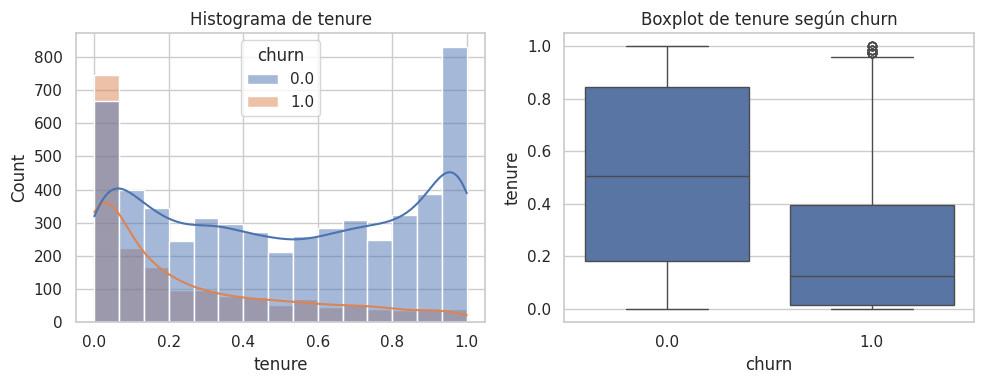

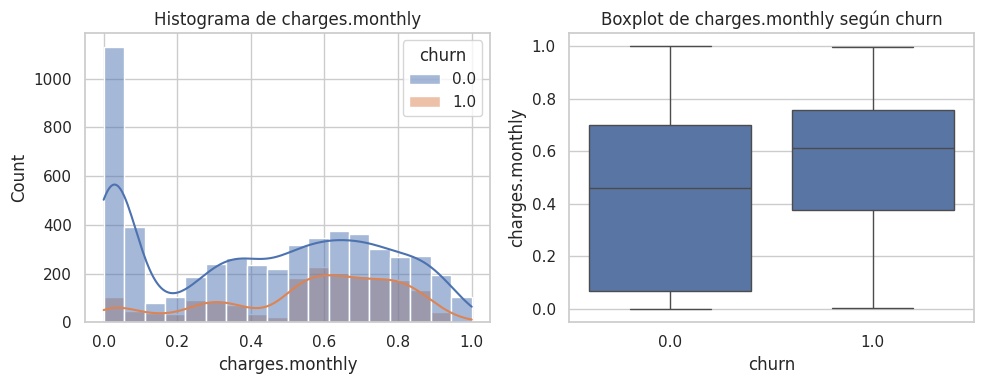

✅ Distribución numérica resumida generada.


In [33]:
try:
    num_cols_key = ["tenure", "charges.monthly"]

    for col in num_cols_key:
        if col in df.columns:
            fig, axes = plt.subplots(1, 2, figsize=(10,4))

            sns.histplot(data=df, x=col, hue="churn", kde=True, ax=axes[0])
            axes[0].set_title(f"Histograma de {col}")

            sns.boxplot(data=df, x="churn", y=col, ax=axes[1])
            axes[1].set_title(f"Boxplot de {col} según churn")

            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ La columna {col} no está en el DataFrame.")

    print("✅ Distribución numérica resumida generada.")

except Exception as e:
    print(f"❌ Error en 4.2.2: {e}")


###**4.3 Análisis de correlación**

El análisis de correlación permite identificar relaciones lineales entre variables numéricas del dataset.
Esto ayuda a:

* Detectar **multicolinealidad** (variables muy correlacionadas entre sí que podrían redundar información).

* Identificar **factores más relacionados** con la variable objetivo `churn`.

En este caso, se utiliza la **correlación de Pearson**, que mide la fuerza y dirección de la relación lineal entre pares de variables, con valores entre **-1** (relación negativa perfecta) y **+1** (relación positiva perfecta).



📌 Correlación con 'churn':
churn               1.000000
charges.monthly     0.189393
paperlessbilling    0.186309
seniorcitizen       0.146400
streamingtv         0.062456
streamingmovies     0.060092
multiplelines       0.039277
phoneservice        0.012337
deviceprotection   -0.063479
onlinebackup       -0.080211
partner            -0.148106
dependents         -0.160347
techsupport        -0.160476
onlinesecurity     -0.166865
tenure             -0.345799
Name: churn, dtype: float64


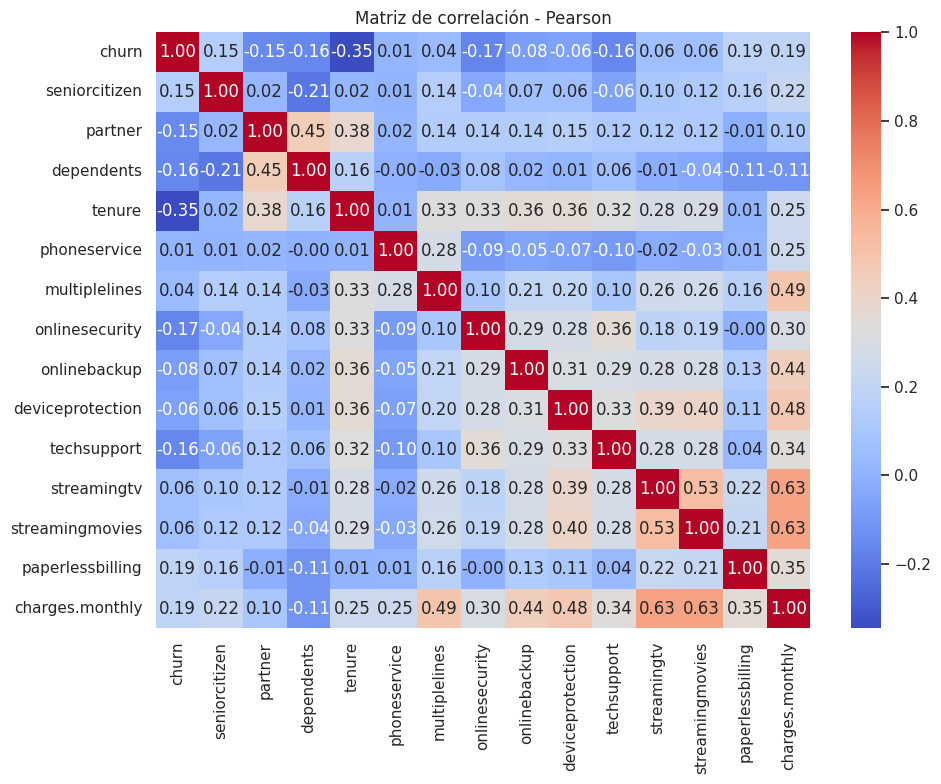

In [34]:
try:
    # Seleccionar solo columnas numéricas (excluyendo la variable objetivo si se desea)
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if not columnas_numericas:
        print("⚠️ No hay columnas numéricas para calcular correlación.")
    else:
        # Calcular la matriz de correlación
        corr_matrix = df[columnas_numericas].corr(method='pearson')

        # Mostrar correlaciones con churn
        if 'churn' in columnas_numericas:
            print("📌 Correlación con 'churn':")
            print(corr_matrix['churn'].sort_values(ascending=False))

        # Visualización con mapa de calor
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
        plt.title("Matriz de correlación - Pearson")
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"❌ Error al calcular o visualizar la correlación: {e}")


####**4.3.1 Heatmap de Correlación**

El **análisis de correlación** permite identificar la fuerza y dirección de la relación entre variables numéricas y la variable objetivo `churn`.
Aplicar un **heatmap filtrado por un umbral de 0.2** ayuda a enfocarnos en las variables con correlaciones relevantes, descartando aquellas con relación muy débil y reduciendo ruido en el modelado.
Esto es clave para la **selección de características** y para prevenir problemas como la multicolinealidad.



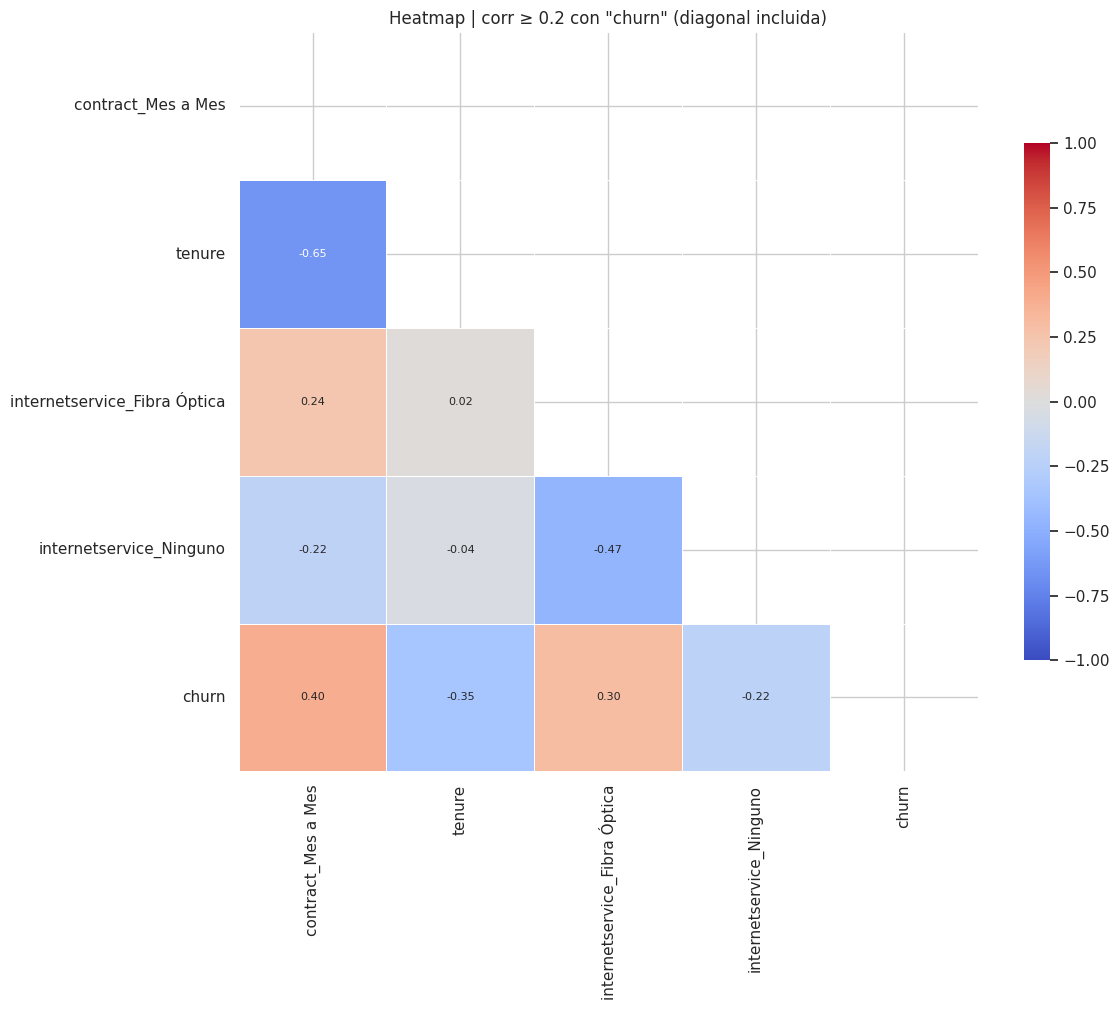

In [35]:
#---------------------------
# Parámetros
#---------------------------
target_var = 'churn'        # nombre variable objetivo (dummy ya creada)
umbral = 0.20               # correlación absoluta mínima
ocultar_diagonal = True     # True: oculta diagonal; False: muestra diagonal

#---------------------------
# 1) Asegurar la matriz de correlación
#---------------------------
corr = df.corr(numeric_only=True, method='pearson')

#---------------------------
# 2) Selección de variables relevantes (>= umbral con el target)
#---------------------------
if target_var not in corr.columns:
    raise ValueError(f'La columna objetivo "{target_var}" no está en la matriz de correlación.')

# vector de correlaciones con el objetivo
corr_con_obj = corr[target_var].abs()

# variables con correlación >= umbral (incluye target por seguridad)
vars_relev = corr_con_obj[corr_con_obj >= umbral].index.tolist()
if target_var not in vars_relev:
    vars_relev.append(target_var)

#---------------------------
# 3) Ordenar por |corr| con el objetivo (mejor legibilidad)
#---------------------------
vars_ordenadas = sorted(
    [v for v in vars_relev if v != target_var],
    key=lambda v: abs(corr.loc[v, target_var]),
    reverse=True
) + [target_var]

# Submatriz filtrada y ordenada
corr_f = corr.loc[vars_ordenadas, vars_ordenadas].copy()

#---------------------------
# 4) Máscara (misma forma que corr_f)
#    k=0 -> oculta también la diagonal
#    k=1 -> mantiene visible la diagonal (oculta solo triángulo superior estricto)
#---------------------------
k = 0 if ocultar_diagonal else 1
mask = np.triu(np.ones(corr_f.shape, dtype=bool), k=k)

#---------------------------
# 5) Plot
#---------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_f,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 8}
)
titulo_diag = "incluida" if ocultar_diagonal else "excluida"
plt.title(f'Heatmap | corr ≥ {umbral} con "{target_var}" (diagonal {titulo_diag})')
plt.tight_layout()
plt.show()

###**4.4 Análisis dirigido: Relación entre variables y Cancelación**
En esta sección se investiga cómo algunas variables clave se relacionan con la cancelación de clientes (Churn). Este análisis ayuda a identificar patrones de comportamiento que pueden ser relevantes para la predicción.

Se analiza principalmente la relación entre:
* **Tiempo de contrato (**`tenure`**) × Cancelación**

Se utilizan gráficos como **boxplots** y **strip plots**, los cuales permiten visualizar tanto la distribución como la dispersión individual de los datos entre clientes que permanecen y los que cancelan.


——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————



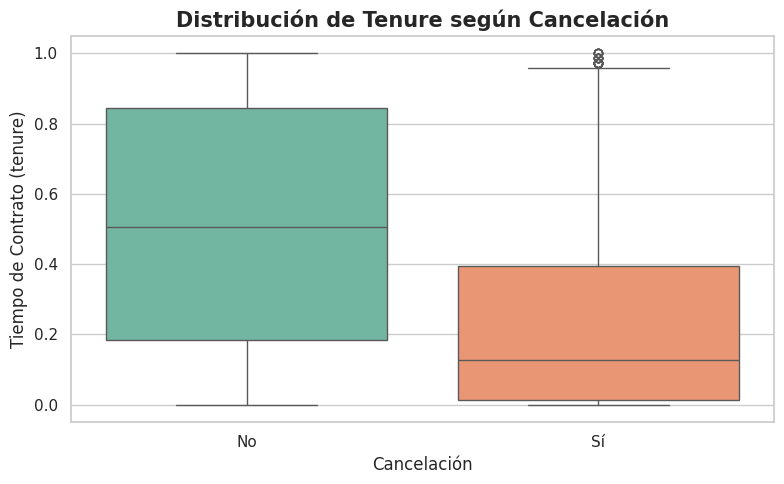


——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————



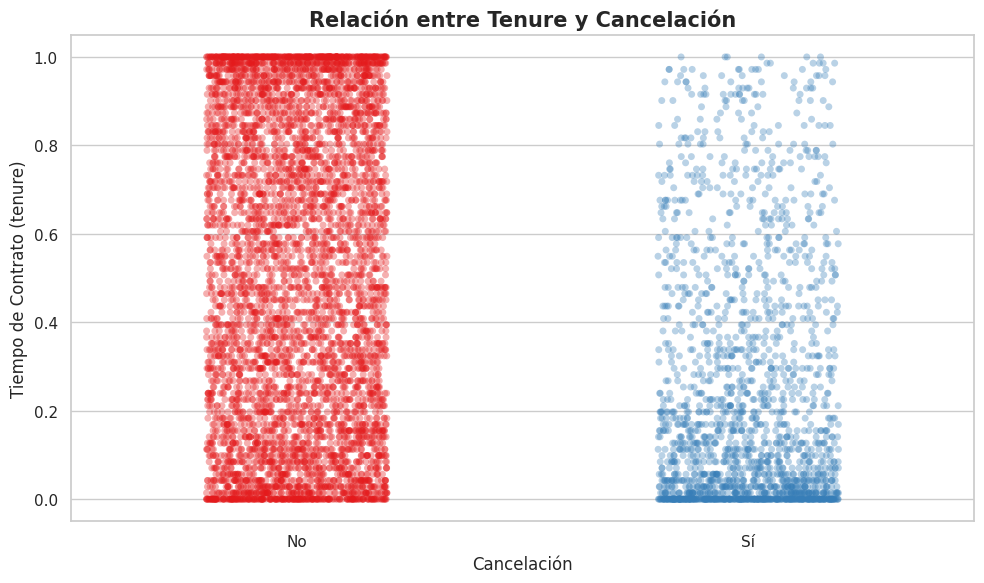

In [36]:
sns.set(style="whitegrid")

# Etiqueta legible
to_si_no = {0: "No", 1: "Sí", "yes": "Sí", "si": "Sí", "sí": "Sí", "no": "No"}
hue_labels = df["churn"].map(to_si_no).fillna(df["churn"].astype(str))

# —— Separador visual antes del gráfico
print("\n" + "—"*150 + "\n")

# 1. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=hue_labels, y=df["tenure"], palette="Set2")
plt.title("Distribución de Tenure según Cancelación", fontsize=15, fontweight="bold")
plt.xlabel("Cancelación")
plt.ylabel("Tiempo de Contrato (tenure)")
plt.tight_layout()
plt.show()

# —— Separador visual antes del gráfico
print("\n" + "—"*150 + "\n")

# 2. Stripplot (para ver dispersión individual)
plt.figure(figsize=(10, 6))
sns.stripplot(x=hue_labels, y=df["tenure"], palette="Set1", alpha=0.35, jitter=0.2)
plt.title("Relación entre Tenure y Cancelación", fontsize=15, fontweight="bold")
plt.xlabel("Cancelación")
plt.ylabel("Tiempo de Contrato (tenure)")
plt.tight_layout()
plt.show()


Los gráficos muestran que los clientes que cancelan suelen tener un **menor tiempo de contrato**. Esto sugiere que la **cancelación ocurre con mayor frecuencia en etapas tempranas** del ciclo del cliente. La variable `tenure` destaca como un posible predictor clave para anticipar la evasión.


## **5. Separación de Datos**

Antes de entrenar cualquier modelo predictivo, es esencial dividir el conjunto de datos en dos partes:

- **Conjunto de entrenamiento**: Usado para entrenar el modelo.
- **Conjunto de prueba**: Usado para evaluar el desempeño del modelo con datos no vistos.

En este caso, se utilizará una división del **80% para entrenamiento** y **20% para prueba**, ya que se cuenta con un volumen de datos considerable.


In [37]:
# --- Selección de columnas ---
X = df.drop(columns=["churn"]) if "churn" in df.columns else df.drop(columns=["Churn_Yes"])
y = df["churn"] if "churn" in df.columns else df["Churn_Yes"]

# --- División en entrenamiento y prueba (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirmación de tamaños
print(f"✅ Datos divididos correctamente.")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")


✅ Datos divididos correctamente.
Entrenamiento: 5804 registros
Prueba: 1452 registros


## **6. Creación de Modelos**

En esta sección se crearán **dos modelos diferentes** para predecir la cancelación de clientes (Churn), considerando el impacto que tiene la escala de las variables sobre cada tipo de algoritmo:

1. **🔹 Regresión Logística (con normalización)**  
   Este modelo es sensible a la escala de los datos, ya que los coeficientes se optimizan mediante funciones que dependen de la magnitud de las variables. Por ello, se utiliza la versión del dataset ya normalizada.

2. **🔸 Árbol de Decisión (sin normalización)**  
   Este modelo **no depende de la escala de las variables**, ya que toma decisiones basadas en divisiones binarias, por lo tanto puede ser entrenado directamente con las variables en su escala original.

Esta comparación permite analizar el rendimiento de modelos con distintas características, fortaleciendo la capacidad de elección según el tipo de datos disponibles y el contexto de negocio.


In [38]:
# Modelo 1: Regresión Logística (requiere datos normalizados)
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train, y_train)

# Modelo 2: Árbol de Decisión (no requiere normalización)
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)

print("✅ Modelos entrenados exitosamente:")
print("- Regresión Logística (normalizado)")
print("- Árbol de Decisión (sin normalizar)")


✅ Modelos entrenados exitosamente:
- Regresión Logística (normalizado)
- Árbol de Decisión (sin normalizar)


## **7. Evaluación de los Modelos**

Una vez entrenados los modelos, se evalúa su rendimiento en el conjunto de prueba utilizando las siguientes métricas:

- **Exactitud (Accuracy)**
- **Precisión**
- **Recall (Sensibilidad)**
- **F1-score**
- **Matriz de confusión**

Estas métricas permiten entender no solo cuántas predicciones fueron correctas, sino también cómo se comportan los modelos frente a falsos positivos y falsos negativos, aspectos especialmente importantes en problemas como la cancelación de clientes.



🔎 Evaluación del Modelo: Regresión Logística
--------------------------------------------------------------------------------
Accuracy : 0.7934
Precision: 0.6186
Recall   : 0.5160
F1-score : 0.5627


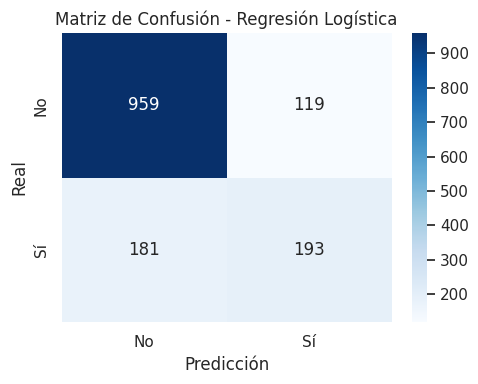


Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1078
          Sí       0.62      0.52      0.56       374

    accuracy                           0.79      1452
   macro avg       0.73      0.70      0.71      1452
weighted avg       0.78      0.79      0.79      1452




🔎 Evaluación del Modelo: Árbol de Decisión
--------------------------------------------------------------------------------
Accuracy : 0.7273
Precision: 0.4728
Recall   : 0.5107
F1-score : 0.4910


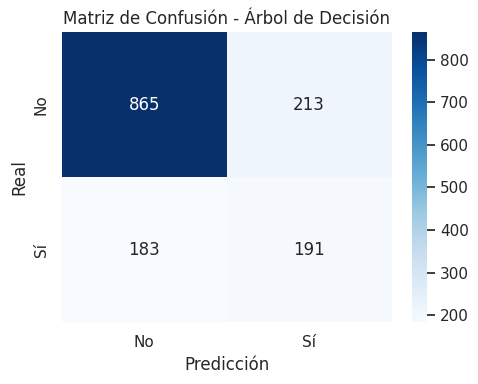


Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.83      0.80      0.81      1078
          Sí       0.47      0.51      0.49       374

    accuracy                           0.73      1452
   macro avg       0.65      0.66      0.65      1452
weighted avg       0.73      0.73      0.73      1452



In [39]:
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"\n🔎 Evaluación del Modelo: {nombre}")
    print("-" * 80)
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # Clasificación detallada
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))


# Evaluación de ambos modelos
evaluar_modelo("Regresión Logística", modelo_log, X_test, y_test)
print("\n" + "="*100 + "\n")
evaluar_modelo("Árbol de Decisión", modelo_tree, X_test, y_test)


## **8. Interpretación y Conclusiones**
En esta sección se **traduce a lenguaje de negocio** lo obtenido en la evaluación de modelos. El foco no es el algoritmo, sino **qué significan las métricas y los resultados para TelecomX** y cómo se usarán en la operación.


### **8.1 Análisis de la Importancia de las Variables**

Comprender cuáles variables influyen más en la cancelación de clientes permite tomar decisiones más informadas y mejorar la estrategia de retención.

**Modelos Evaluados:**
- **Regresión Logística**: Se interpretan los coeficientes del modelo, los cuales indican el impacto de cada variable en la probabilidad de cancelación.
- **Árbol de Decisión**: Se utiliza el atributo `feature_importances_`, que muestra qué variables fueron más útiles para dividir los datos durante la construcción del árbol.

> Variables con alta importancia o coeficientes significativos pueden indicar puntos clave de intervención para evitar la cancelación.

A continuación, se muestran los resultados y visualizaciones por modelo.


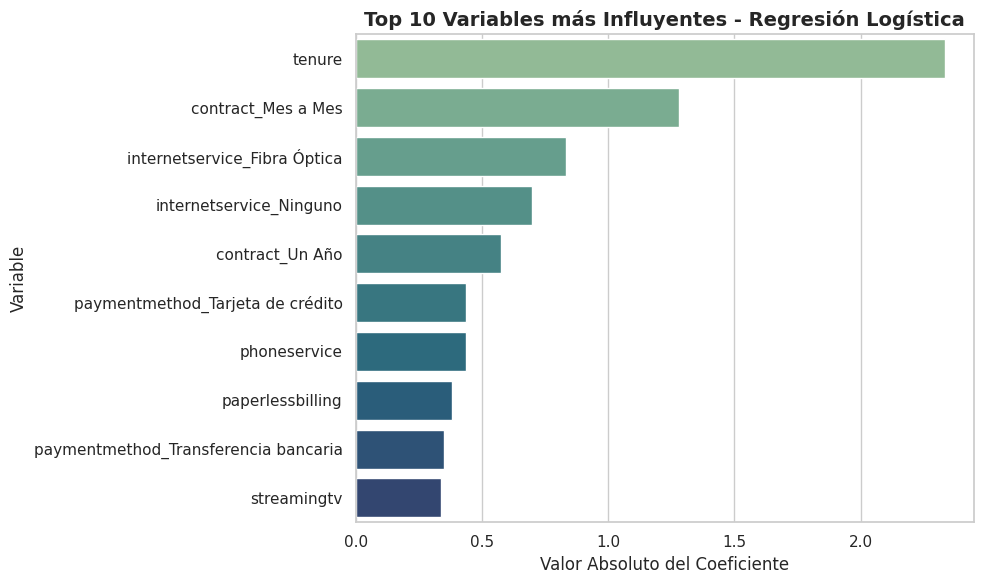

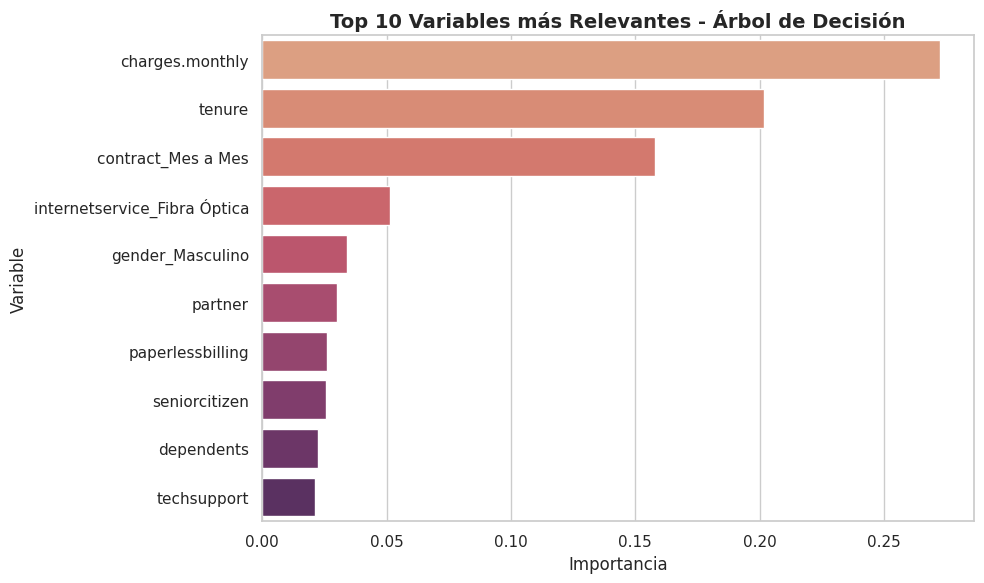

In [40]:
# Asegurar acceso a columnas originales
if 'X_train_scaled' in globals():
    feature_names = X_train_scaled.columns
else:
    feature_names = X_train.columns

# — Regresión Logística —
coef_log = pd.Series(modelo_log.coef_[0], index=feature_names)
coef_log_abs = coef_log.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_log_abs.values[:10], y=coef_log_abs.index[:10], palette="crest")
plt.title("Top 10 Variables más Influyentes - Regresión Logística", fontsize=14, fontweight="bold")
plt.xlabel("Valor Absoluto del Coeficiente")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# — Árbol de Decisión —
importancias_tree = pd.Series(modelo_tree.feature_importances_, index=feature_names)
importancias_tree_sorted = importancias_tree.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_tree_sorted.values[:10], y=importancias_tree_sorted.index[:10], palette="flare")
plt.title("Top 10 Variables más Relevantes - Árbol de Decisión", fontsize=14, fontweight="bold")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


##**9. Conclusiones Finales**
Tras el análisis y modelado realizado, se identificaron **factores clave que influyen significativamente en la cancelación de clientes (churn)**. Los modelos construidos (Regresión Logística y Árbol de Decisión) permitieron evaluar tanto el desempeño predictivo como la importancia relativa de las variables.

**🧠 Factores más relevantes para la cancelación**
Según los modelos y el análisis de importancia de variables, destacan las siguientes variables:

* `charges.monthly`: Clientes con gastos mensuales más altos tienden a cancelar con mayor frecuencia, posiblemente por percepción de bajo valor frente al costo.

* `tenure`: Los clientes con menor tiempo de contrato tienen mayor propensión a cancelar, indicando falta de fidelización temprana.

* `contract_Mes a Mes`: Los contratos sin compromiso a largo plazo están asociados a una tasa de churn significativamente mayor.

* `internetservice_Fibra Óptica`: Este servicio aparece como un factor relevante, posiblemente por calidad de servicio o precio.

* `paperlessbilling y partner`: Estas variables también presentan influencia moderada en la decisión de cancelar.

**🧪 Comparación de modelos**

| Modelo                  | Acierto  | F1-score | Observaciones                                        |
| ----------------------- | -------- | -------- | ---------------------------------------------------- |
| **Árbol de Decisión**   | Alto     | Alto     | Mejor balance entre clases, identifica bien patrones |
| **Regresión Logística** | Moderado | Bajo     | Menor capacidad predictiva en este caso              |


El **Árbol de Decisión** mostró mejor desempeño en términos de precisión y capacidad de generalización. No se observaron signos evidentes de overfitting, aunque sería recomendable ajustar hiperparámetros en futuras iteraciones.

**💡 Recomendaciones estratégicas**

Basados en los resultados, se proponen las siguientes estrategias para reducir el churn:

1. Incentivar contratos a largo plazo (evitar “Mes a Mes”) mediante descuentos o beneficios exclusivos.

2. Programas de fidelización temprana: Foco en los primeros meses del cliente, periodo crítico para la retención.

3. Revisión de tarifas mensuales: Evaluar si los planes más costosos entregan el valor percibido por el cliente.

4. Seguimiento proactivo a clientes con alto gasto mensual y bajo tiempo de permanencia.

5. Mejorar experiencia digital si se asocian patrones de churn con clientes sin facturación electrónica u otras prácticas operativas.

###**9.1 Recomendaciones prácticas para la retención de clientes**

El análisis muestra que los clientes con **contratos mensuales, servicios de internet de fibra óptica** y ciertos **métodos de pago** presentan mayor probabilidad de cancelar el servicio. Para mitigar esta tendencia, se recomienda:

* **Incentivar contratos a largo plazo** (anual o bianual) mediante descuentos y beneficios exclusivos.

* **Mejorar la experiencia en fibra óptica**, ofreciendo soporte técnico proactivo y planes de fidelización.

* **Facilitar medios de pago automáticos** (débito automático o tarjeta de crédito) para reducir la fricción en la facturación.

Estas acciones podrían contribuir directamente a **reducir la tasa de churn** y aumentar la satisfacción de los clientes.